In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('uw_web_cat_usage_v2_withColAnnotations.csv')
df.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,dt,browser,parent_category,sub_category,duration_ms,page_load_count,site_count,domain_count,page_visit_count
0,12:49.0,20201219-190228,2020121918-i-04a9a906e1cd5620c-0Bx7AdLHChV8HZw...,V8_2_WEB_CAT_USAGE_20201219185021.V8,011465d5a77a4d9cacb63d0d1703f26b,47:55.0,49:04.0,47:55.0,49:04.0,12/18/2020,chrome,other,unclassified,4704335,54,49,8,321
1,12:49.0,20201219-190228,2020121918-i-04a9a906e1cd5620c-0Bx7AdLHChV8HZw...,V8_2_WEB_CAT_USAGE_20201219185021.V8,011465d5a77a4d9cacb63d0d1703f26b,47:55.0,49:04.0,47:55.0,49:04.0,12/18/2020,chrome,games,other,39987,6,8,1,10
2,12:49.0,20201219-190228,2020121918-i-04a9a906e1cd5620c-0Bx7AdLHChV8HZw...,V8_2_WEB_CAT_USAGE_20201219185021.V8,011465d5a77a4d9cacb63d0d1703f26b,47:55.0,49:04.0,47:55.0,49:04.0,12/18/2020,chrome,entertainment,video streaming,158987,1,1,1,61
3,12:49.0,20201219-190228,2020121918-i-04a9a906e1cd5620c-0Bx7AdLHChV8HZw...,V8_2_WEB_CAT_USAGE_20201219185021.V8,011465d5a77a4d9cacb63d0d1703f26b,47:55.0,49:04.0,47:55.0,49:04.0,12/18/2020,chrome,news,news,5563820,61,21,2,89
4,12:49.0,20201219-190228,2020121918-i-04a9a906e1cd5620c-0Bx7AdLHChV8HZw...,V8_2_WEB_CAT_USAGE_20201219185021.V8,011465d5a77a4d9cacb63d0d1703f26b,47:55.0,49:04.0,47:55.0,49:04.0,12/18/2020,chrome,search,search,179213,37,36,1,33


In [2]:
print(df.shape)

(13634, 18)


In [3]:
print(list(df.columns)) 

['load_ts', 'batch_id', 'audit_zip', 'audit_internal_path', 'guid', 'interval_start_utc', 'interval_end_utc', 'interval_local_start', 'interval_local_end', 'dt', 'browser', 'parent_category', 'sub_category', 'duration_ms', 'page_load_count', 'site_count', 'domain_count', 'page_visit_count']


In [4]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13634 entries, 0 to 13633
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   load_ts               13634 non-null  object
 1   batch_id              13634 non-null  object
 2   audit_zip             13634 non-null  object
 3   audit_internal_path   13634 non-null  object
 4   guid                  13634 non-null  object
 5   interval_start_utc    13634 non-null  object
 6   interval_end_utc      13634 non-null  object
 7   interval_local_start  13634 non-null  object
 8   interval_local_end    13634 non-null  object
 9   dt                    13634 non-null  object
 10  browser               13634 non-null  object
 11  parent_category       13634 non-null  object
 12  sub_category          13634 non-null  object
 13  duration_ms           13634 non-null  int64 
 14  page_load_count       13634 non-null  int64 
 15  site_count            13634 non-null

In [5]:
df.describe()

,duration_ms,page_load_count,site_count,domain_count,page_visit_count
count,1.363400e+04,13634.000000,13634.000000,13634.000000,13634.000000
mean,2.267824e+06,24.509388,18.234341,2.014009,84.258912
std,6.607673e+06,67.841476,74.427439,3.550356,260.598771
min,0.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,3.819750e+04,2.000000,2.000000,1.000000,4.000000
50%,2.240985e+05,6.000000,5.000000,1.000000,15.000000
75%,1.520930e+06,22.000000,16.000000,2.000000,61.000000
max,1.139537e+08,3734.000000,6901.000000,90.000000,6138.000000


In [6]:
df.describe(include=['object', 'bool'])

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,dt,browser,parent_category,sub_category
count,13634,13634,13634,13634,13634,13634,13634,13634,13634,13634,13634,13634,13634
unique,23,23,1881,1879,100,1467,1471,1462,1480,25,3,15,26
top,34:38.0,20201216-201728,2021010615-i-04a9a906e1cd5620c-kWH1uCWUfqZoI4A...,V8_2_WEB_CAT_USAGE_20210106103901.V8,0efd28b5b9a248be8c75161f4cff49a6,44:53.0,48:07.0,44:53.0,57:23.0,12/29/2020,chrome,entertainment,unclassified
freq,700,700,27,27,345,44,57,44,41,676,12221,2632,2340


In [7]:
df['duration_ms'].mean()

2267823.97440223

In [8]:
df['parent_category'].value_counts()

entertainment       2632
other               2340
search              1989
social              1554
mail                 739
games                673
productivity         615
reference            591
news                 584
shopping             562
private              429
education            395
finance              262
content creation     207
recreation            62
Name: parent_category, dtype: int64

In [9]:
df['sub_category'].value_counts()

unclassified                 2340
search                       1989
video streaming              1955
other                        1561
social network                840
mail                          739
reference                     591
news                          584
communication                 579
shopping                      562
private                       429
education                     395
banking and accounting        262
programming                   151
communication - live          135
web design / development      116
photo edit/creation            80
music / audio streaming        74
travel                         62
video games                    62
spreadsheets                   53
word processing                45
video/audio edit/creation      11
project management              8
presentations                   7
crm                             4
Name: sub_category, dtype: int64

In [10]:
df[df['parent_category']=='entertainment']['duration_ms'].mean()

4606769.9874620065

In [11]:
parent_category_item = ['entertainment', 'other', 'search', 'social', 'mail', 'games', 'productivity', 'reference', 'news', 'shopping', 'private', 'education', 'finance', 'content creation', 'recreation']                 
sub_category_item = ['unclassified', 
'search','video streaming','other','social network','mail','reference','news','communication','shopping','private',                       
'education','banking and accounting',        
'programming','communication - live', 'web design / development',      
'photo edit/creation','music / audio streaming','video games','travel','spreadsheets',                   
'word processing','video/audio edit/creation',      
'project management','presentations', 'crm']                
        

In [12]:
parent_category_duration=[]
for i in parent_category_item:
    duration = df[df['parent_category']==i]['duration_ms'].mean()
    parent_category_duration.append(duration)
print(parent_category_duration)

[4606769.9874620065, 3317037.3294871794, 803477.4756158874, 1116943.583011583, 937090.2787550744, 1495028.8766716197, 364908.77073170734, 443779.1895093063, 1692469.397260274, 1088435.4644128114, 7737719.249417249, 1029645.475949367, 384834.08396946563, 315411.40579710144, 338894.6129032258]


In [13]:
sub_category_duration=[]
for i in sub_category_item:
    duration = df[df['sub_category']==i]['duration_ms'].mean()
    sub_category_duration.append(duration)
print(sub_category_duration)

[3317037.3294871794, 803477.4756158874, 5816847.7468030695, 1177024.34016656, 1272518.6357142858, 937090.2787550744, 443779.1895093063, 1692469.397260274, 745467.9343696027, 1088435.4644128114, 7737719.249417249, 1029645.475949367, 384834.08396946563, 515812.7880794702, 1742138.8148148148, 333632.6896551724, 285580.075, 321974.3378378378, 259960.64516129033, 338894.6129032258, 180553.35849056602, 363378.15555555554, 340214.8181818182, 164352.5, 80964.28571428571, 171322.0]


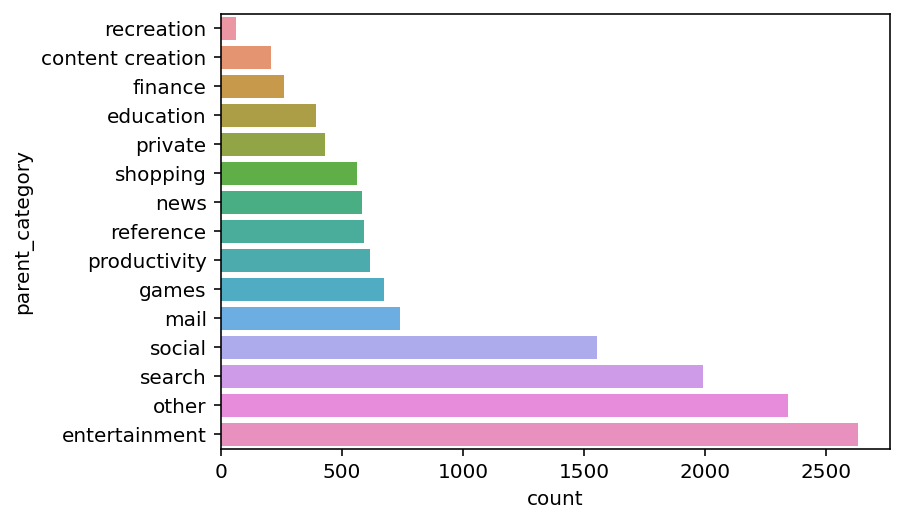

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.countplot(y='parent_category', data=df, order=df['parent_category'].value_counts().sort_values().index);

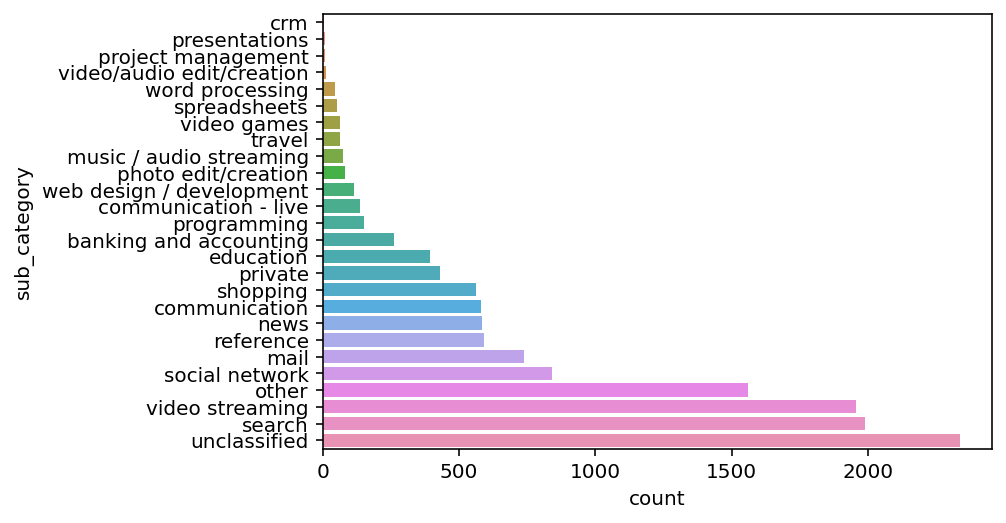

In [34]:
sns.countplot(y='sub_category', data=df, order=df['sub_category'].value_counts().sort_values().index);

C:\Users\hooga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


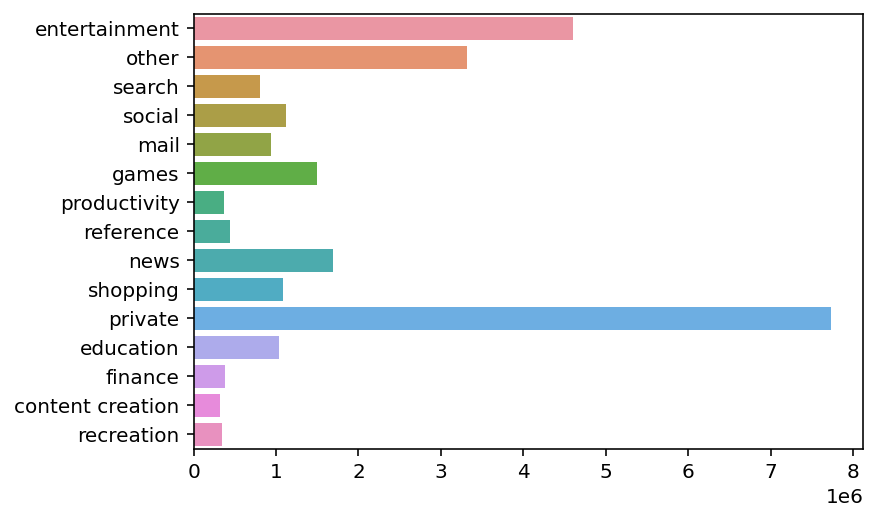

In [17]:
X = np.array(parent_category_item)
Y = np.array(parent_category_duration)

ax = sns.barplot(Y,X, order=X)
plt.show()

C:\Users\hooga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


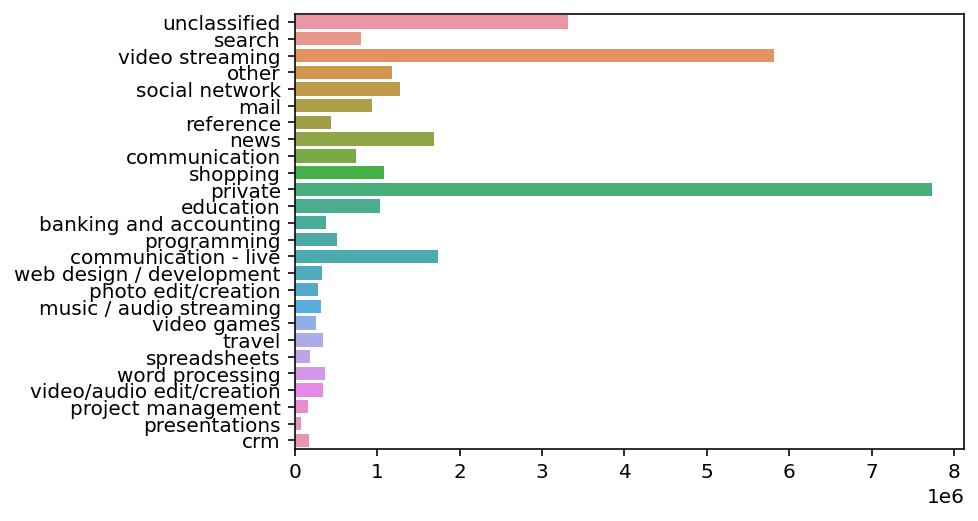

In [18]:
X_sub = np.array(sub_category_item)
Y_sub = np.array(sub_category_duration)

ax = sns.barplot(Y_sub,X_sub, order=X_sub)
plt.show()

In [19]:
df['browser'].value_counts()

chrome     12221
edge        1018
firefox      395
Name: browser, dtype: int64

In [20]:
browser_item = ['chrome', 'edge', 'firefox']

browser_duration=[]
for i in browser_item:
    duration = df[df['browser']==i]['duration_ms'].mean()
    browser_duration.append(duration)
print(browser_duration)

[2264668.945585468, 2703882.7455795677, 1241620.8810126581]


C:\Users\hooga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


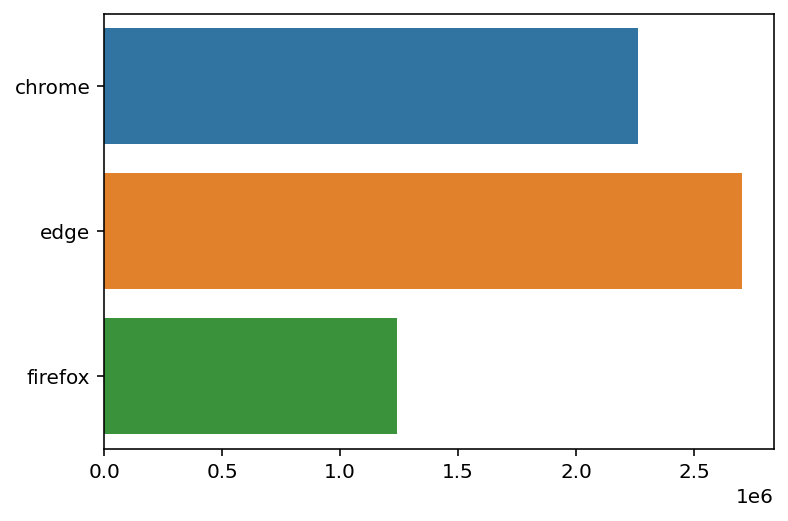

In [21]:
X_browser = np.array(browser_item)
Y_browser = np.array(browser_duration)

ax = sns.barplot(Y_browser,X_browser, order=X_browser)
plt.show()

In [22]:
df[(df['browser'] == 'chrome') & (df['parent_category'] == 'entertainment')].count()

load_ts                 2318
batch_id                2318
audit_zip               2318
audit_internal_path     2318
guid                    2318
interval_start_utc      2318
interval_end_utc        2318
interval_local_start    2318
interval_local_end      2318
dt                      2318
browser                 2318
parent_category         2318
sub_category            2318
duration_ms             2318
page_load_count         2318
site_count              2318
domain_count            2318
page_visit_count        2318
dtype: int64

In [23]:
df[(df['browser'] == 'chrome')]['parent_category'].value_counts()



entertainment       2318
other               2019
search              1786
social              1472
mail                 660
games                609
productivity         562
reference            533
shopping             518
news                 495
private              400
education            354
finance              243
content creation     201
recreation            51
Name: parent_category, dtype: int64

In [24]:
Chrome = df[(df['browser'] == 'chrome')]['parent_category'].value_counts()
print(type(Chrome))
Chorme_index = ['entertainment', 'other', 'search', 
                'social', 'mail', 'games', 'productivity', 
                'reference', 'shopping', 'news',  
                'private', 'education', 
                'finance', 'content creation', 'recreation']
Chrome_count = []
for i in Chrome:
    Chrome_count.append(i)
    
print(Chrome_count)
print(len(Chorme_index))
print(len(Chrome_count))


<class 'pandas.core.series.Series'>
[2318, 2019, 1786, 1472, 660, 609, 562, 533, 518, 495, 400, 354, 243, 201, 51]
15
15


C:\Users\hooga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


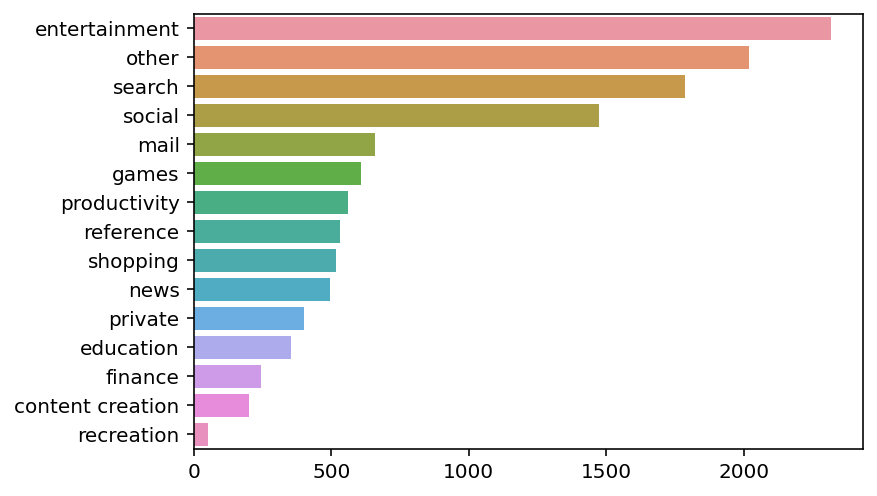

In [25]:
X_Chrome = np.array(Chorme_index)
Y_Chrome = np.array(Chrome_count)

ax = sns.barplot(Y_Chrome,X_Chrome, order=X_Chrome)
plt.show()

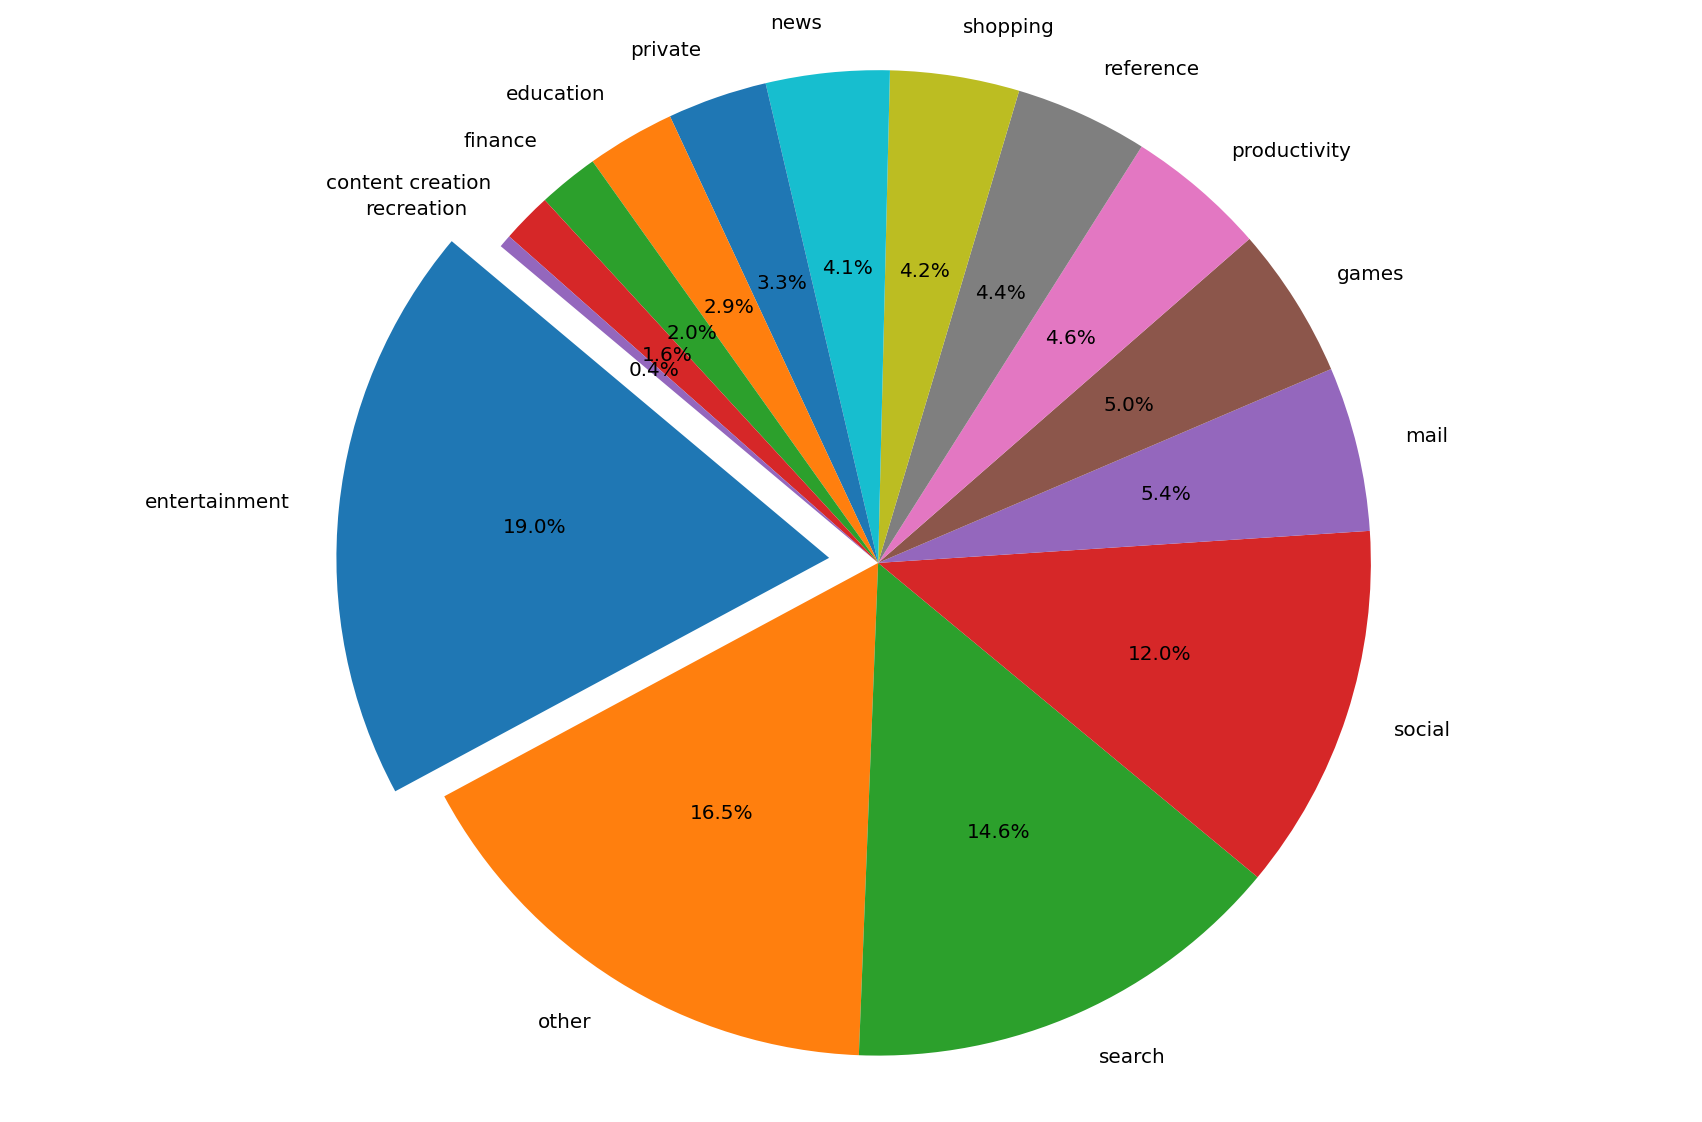

In [26]:
plt.figure(figsize=(15,10))
Chorme_label = 'entertainment', 'other', 'search','social', 'mail', 'games', 'productivity','reference', 'shopping', 'news', 'private', 'education', 'finance', 'content creation', 'recreation'
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(Chrome_count, explode = explode, labels = Chorme_label, autopct = '%1.1f%%', shadow = False, startangle = 140, radius = 1)
plt.axis('equal')
plt.show()

In [27]:
Edge = df[(df['browser'] == 'edge')]['parent_category'].value_counts()
Edge_index = ['other','entertainment', 'search', 
                'mail', 'news', 'games','social', 'education','productivity', 'private', 
                'reference', 'shopping', 
                'finance', 'recreation']
Edge_count = []
for i in Edge:
    Edge_count.append(i)
print(Edge)
print(Edge_count)
print(len(Edge_index))
print(len(Edge_count))

other            247
entertainment    237
search           134
mail              79
news              56
games             52
social            47
education         38
productivity      36
private           28
reference         25
shopping          18
finance           12
recreation         9
Name: parent_category, dtype: int64
[247, 237, 134, 79, 56, 52, 47, 38, 36, 28, 25, 18, 12, 9]
14
14


C:\Users\hooga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


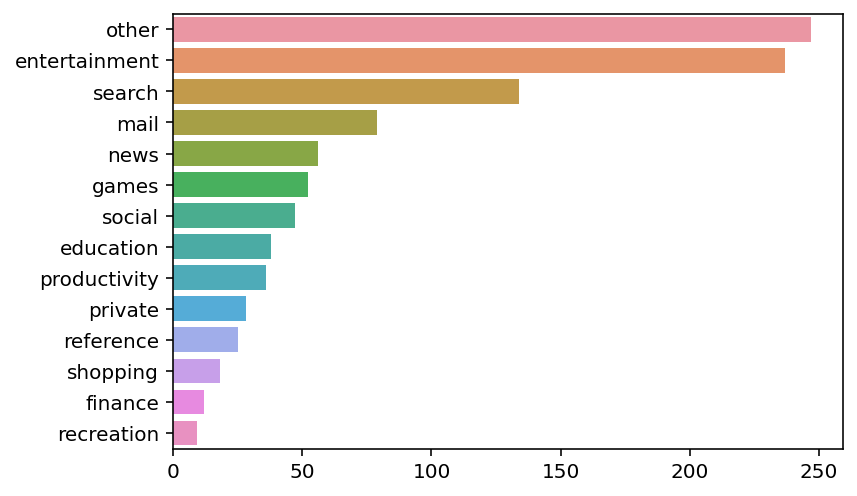

In [28]:
X_Edge = np.array(Edge_index)
Y_Edge = np.array(Edge_count)

ax = sns.barplot(Y_Edge,X_Edge, order=X_Edge)
plt.show()

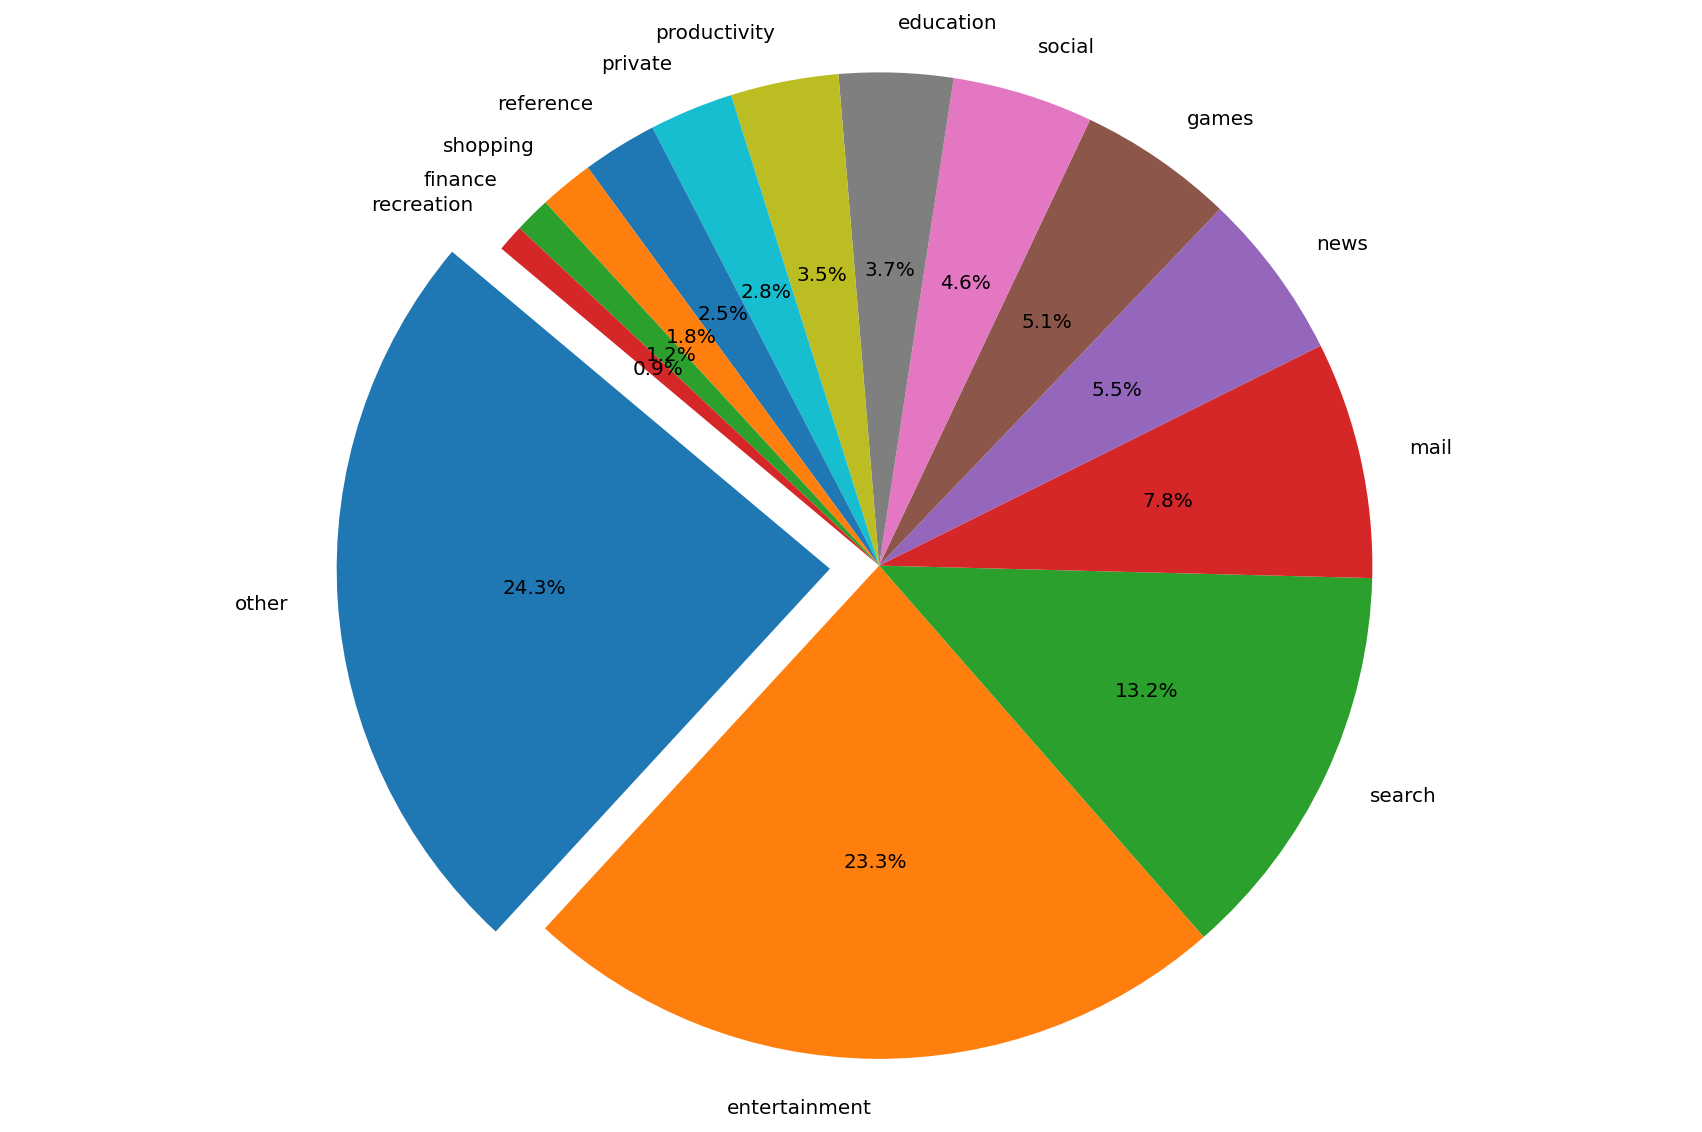

In [29]:
plt.figure(figsize=(15,10))
Edge_label = 'other','entertainment','search','mail','news','games','social','education','productivity','private','reference','shopping','finance','recreation'
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(Edge_count, explode = explode, labels = Edge_label, autopct = '%1.1f%%', shadow = False, startangle = 140, radius = 1)
plt.axis('equal')
plt.show()

In [30]:
Firefox = df[(df['browser'] == 'firefox')]['parent_category'].value_counts()
Firefox_index = ['entertainment','other', 'search', 'social', 'news', 
                 'reference', 'shopping', 'productivity', 'games', 'finance', 'content creation', 
                'education', 'recreation', 'private', 
                   
                  
                 ]
Firefox_count = []
for i in Firefox:
    Firefox_count.append(i)
print(Firefox)
print(Firefox_count)
print(len(Firefox_index))
print(len(Firefox_count))

entertainment       77
other               74
search              69
social              35
reference           33
news                33
shopping            26
productivity        17
games               12
finance              7
content creation     6
education            3
recreation           2
private              1
Name: parent_category, dtype: int64
[77, 74, 69, 35, 33, 33, 26, 17, 12, 7, 6, 3, 2, 1]
14
14


C:\Users\hooga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


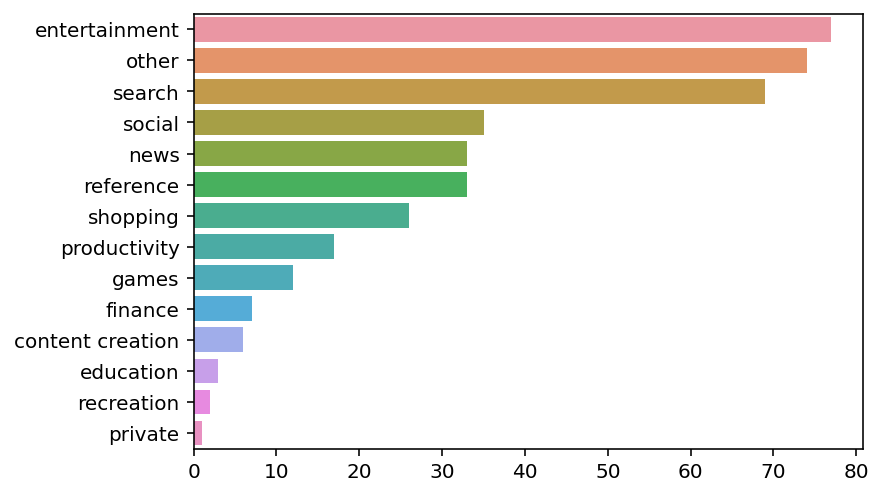

In [31]:
X_Firefox = np.array(Firefox_index)
Y_Firefox = np.array(Firefox_count)

ax = sns.barplot(Y_Firefox,X_Firefox, order=X_Firefox)
plt.show()

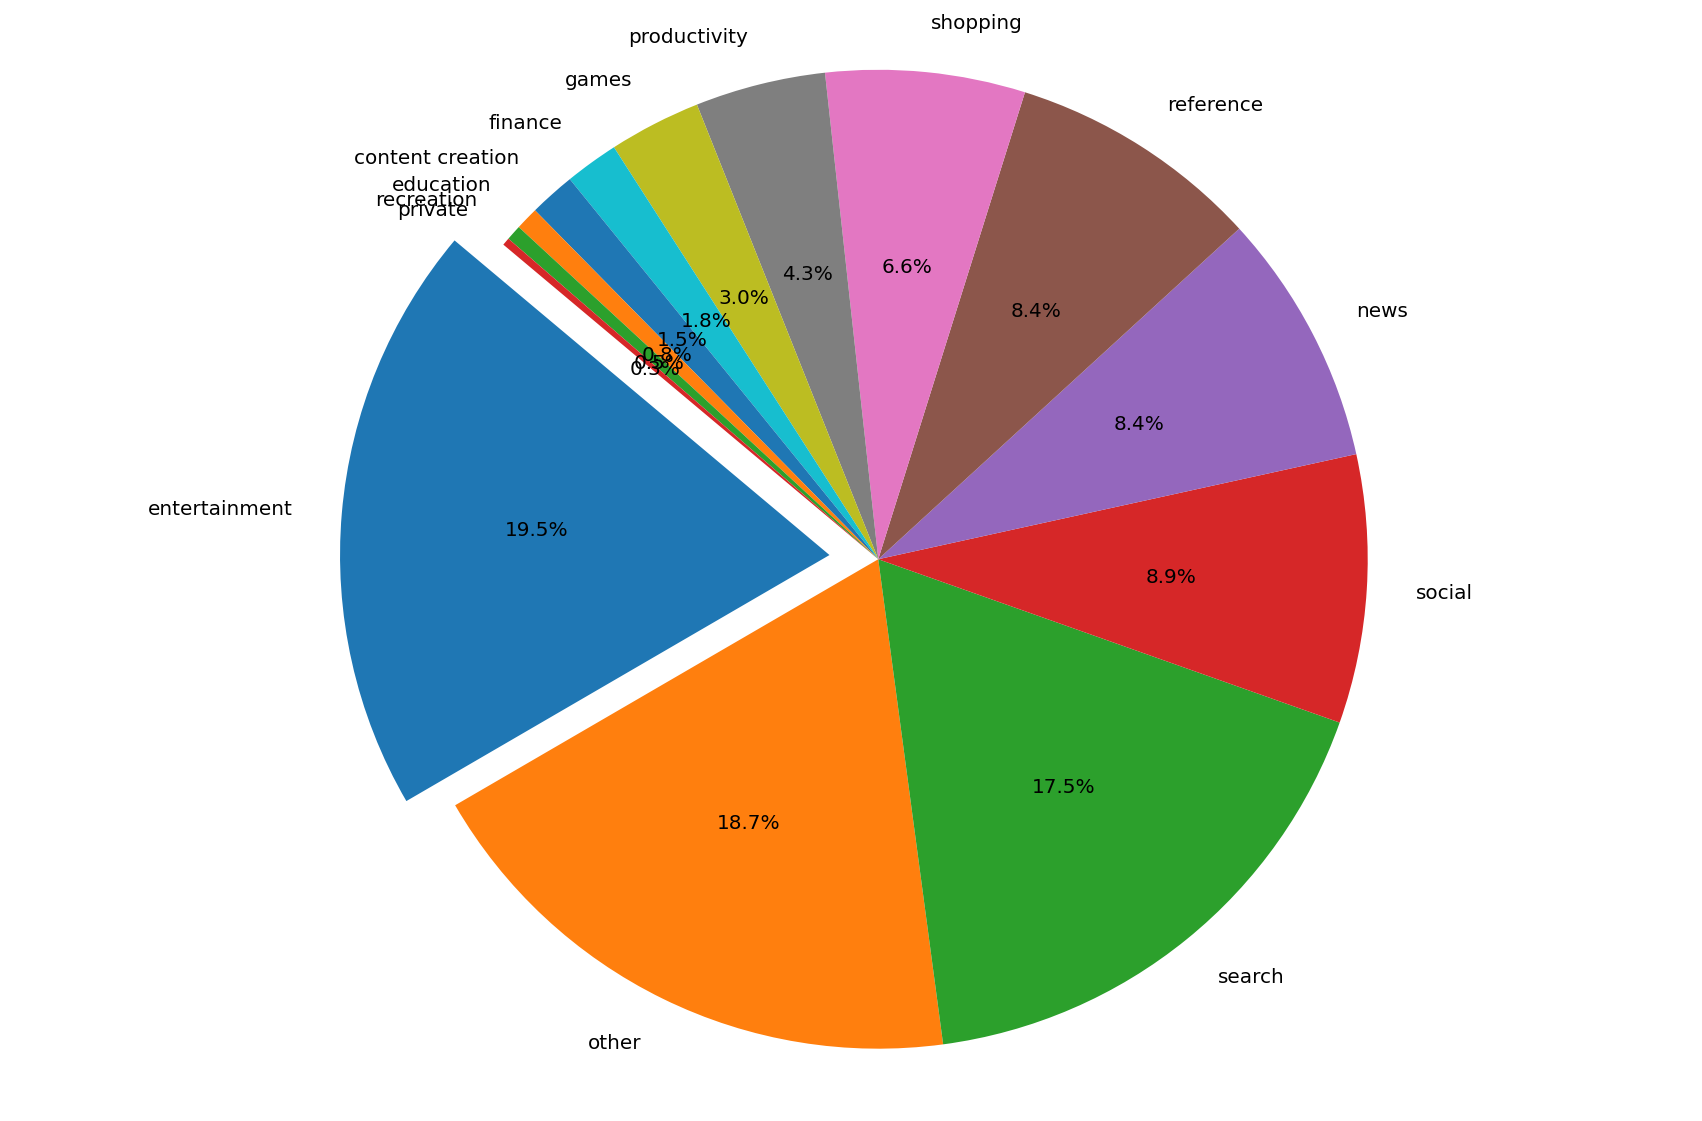

In [32]:
plt.figure(figsize=(15,10))
Firefox_label = 'entertainment','other', 'search', 'social', 'news', 'reference', 'shopping', 'productivity', 'games', 'finance', 'content creation', 'education', 'recreation', 'private',
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(Firefox_count, explode = explode, labels = Firefox_label, autopct = '%1.1f%%', shadow = False, startangle = 140, radius = 1)
plt.axis('equal')
plt.show()